In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from matplotlib.ticker import FuncFormatter
from matplotlib import cm
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.dates import (YEARLY, MONTHLY, DateFormatter, MonthLocator,DayLocator,
                              rrulewrapper, RRuleLocator, drange)
import matplotlib.image as mpimg
from matplotlib.animation import FuncAnimation
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.colors as colors

import numpy as np
from datetime import datetime,timedelta
import seaborn as sns
%matplotlib inline

import urllib.request
from adjustText import adjust_text
import matplotlib.image as mpimg
from matplotlib.animation import FuncAnimation
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

In [2]:
path_data = 'https://github.com/owid/covid-19-data/blob/master/public/data/vaccinations/vaccinations.csv?raw=Tue'

In [3]:
dir = '/Users/mharias/documents/proyectos/covid/vacunacion_paises/'

In [4]:
datos_row = pd.read_csv(path_data)

In [5]:
datos_row

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4729,Zimbabwe,ZWE,2021-02-24,7872.0,7872.0,NaN,3831.0,1312.0,0.05,0.05,NaN,88.0
4730,Zimbabwe,ZWE,2021-02-25,11007.0,11007.0,NaN,3135.0,1572.0,0.07,0.07,NaN,106.0
4731,Zimbabwe,ZWE,2021-02-26,12579.0,12579.0,NaN,1572.0,1750.0,0.08,0.08,NaN,118.0
4732,Zimbabwe,ZWE,2021-02-27,15705.0,15705.0,NaN,3126.0,2150.0,0.11,0.11,NaN,145.0


In [6]:
datos_row[datos_row['location']=='Chile']

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
780,Chile,CHL,2020-12-24,420.0,420.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN
781,Chile,CHL,2020-12-25,5199.0,5199.0,NaN,4779.0,4779.0,0.03,0.03,NaN,250.0
782,Chile,CHL,2020-12-26,8339.0,8339.0,NaN,3140.0,3960.0,0.04,0.04,NaN,207.0
783,Chile,CHL,2020-12-27,8650.0,8650.0,NaN,311.0,2743.0,0.05,0.05,NaN,143.0
784,Chile,CHL,2020-12-28,8650.0,8650.0,NaN,0.0,2058.0,0.05,0.05,NaN,108.0
...,...,...,...,...,...,...,...,...,...,...,...,...
842,Chile,CHL,2021-02-24,3189184.0,3133375.0,55809.0,85976.0,85048.0,16.68,16.39,0.29,4449.0
843,Chile,CHL,2021-02-25,3274458.0,3218512.0,55946.0,85274.0,75123.0,17.13,16.84,0.29,3930.0
844,Chile,CHL,2021-02-26,3351420.0,3295360.0,56060.0,76962.0,65856.0,17.53,17.24,0.29,3445.0
845,Chile,CHL,2021-02-27,3360957.0,3304893.0,56064.0,9537.0,65845.0,17.58,17.29,0.29,3444.0


In [7]:
columnas_interes = ['location', 'date','people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred',
       'people_vaccinated', 'people_fully_vaccinated']

In [28]:
lista_paises = ['Denmark','Germany','Norway','Switzerland','United States','Belgium',
                'France','Ireland','Portugal','Italy','Spain','Sweden','United Kingdom',
                'Austria','Finland','World','Chile']

lista_paises_israel = ['Denmark','Germany','Norway','Switzerland','United States','Belgium',
                'France','Ireland','Portugal','Italy','Spain','Sweden','United Kingdom',
                       'Finland','Israel','Chile','Malta','Polonia']

'''lista_paises = ['Denmark','Germany','Norway','Switzerland','United States','Belgium',
                'France','Ireland','Portugal','Italy','Spain','United Kingdom',
                'Austria','World','Chile','Russia']'''

"lista_paises = ['Denmark','Germany','Norway','Switzerland','United States','Belgium',\n                'France','Ireland','Portugal','Italy','Spain','United Kingdom',\n                'Austria','World','Chile','Russia']"

In [35]:
datos = datos_row.loc[datos_row['location'].isin(lista_paises_israel),columnas_interes].copy()

In [36]:
datos

,location,date,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,people_vaccinated,people_fully_vaccinated
424,Belgium,2020-12-28,0.00,NaN,298.0,NaN
425,Belgium,2020-12-29,0.00,NaN,299.0,NaN
426,Belgium,2020-12-30,0.01,NaN,777.0,NaN
427,Belgium,2020-12-31,0.01,NaN,786.0,NaN
428,Belgium,2021-01-01,0.01,NaN,793.0,NaN
...,...,...,...,...,...,...
4552,United States,2021-02-24,13.53,6.16,45237143.0,20607261.0
4553,United States,2021-02-25,13.78,6.45,46074392.0,21555117.0
4554,United States,2021-02-26,14.11,6.76,47184199.0,22613359.0
4555,United States,2021-02-27,14.48,7.09,48435536.0,23698627.0


In [37]:
fecha_filtro = datetime.today().strftime('%Y-%m-%d')

In [38]:
fecha_filtro = '2021-02-26'

In [39]:
datos = datos[datos['date']==fecha_filtro]

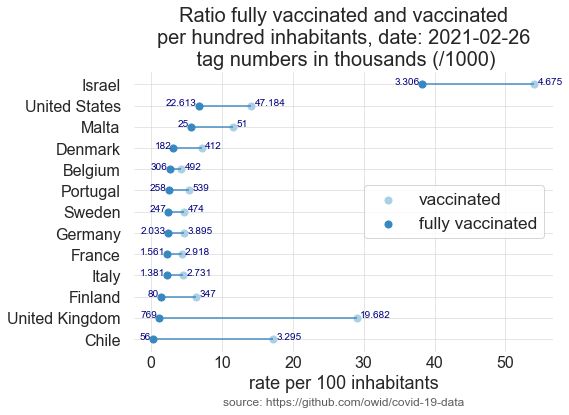

In [40]:

sns.set_style(style="white")
#hoy=datetime.today().strftime('%d/%m')
title = 'Ratio fully vaccinated and vaccinated\nper hundred inhabitants, date: {}\n tag numbers in thousands (/1000)'.format(fecha_filtro)

datos=datos.sort_values('people_fully_vaccinated_per_hundred')

colores = sns.color_palette("Blues_r",2)


my_range=range(1,len(datos.index)+1)
f, ax = plt.subplots(figsize=(8, 6))

ax.hlines(y=my_range, xmin=datos['people_fully_vaccinated_per_hundred'], xmax=datos['people_vaccinated_per_hundred'], 
          color=colores[0],linewidth=2, alpha=0.7)

ax.scatter(datos['people_vaccinated_per_hundred'], my_range, color=colores[1], alpha=1 ,s=50, label='vaccinated')
ax.scatter(datos['people_fully_vaccinated_per_hundred'], my_range, color=colores[0], alpha=1 ,s=50, label='fully vaccinated')

for linea,i in enumerate(datos.index[::]):
    ax.text(s='{:0,.0f}'.format(datos.loc[i,'people_fully_vaccinated']/1000).replace(',','.'),
            x=datos.loc[i,'people_fully_vaccinated_per_hundred']-.3,
            y=linea+1,
            horizontalalignment='right',
            fontsize=10,
           color='navy')
    
    ax.text(s='{:0,.0f}'.format(datos.loc[i,'people_vaccinated']/1000).replace(',','.'),
            x=datos.loc[i,'people_vaccinated_per_hundred']+.5,
            y=linea+1,
            horizontalalignment='left',
            fontsize=10,
           color='navy')
    

ax.legend(loc='center right',fontsize='xx-large')
ax.yaxis.set_tick_params(labelsize=16,width=0,rotation=0,pad=10)
ax.xaxis.set_tick_params(labelsize=16,width=0,rotation=0,pad=0)
ax.set_title(title,fontsize=20)
ax.text(x=0.5, y=-.20, s='source: {}'.format('https://github.com/owid/covid-19-data') , fontsize=12, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)
ax.set_xlabel('rate per 100 inhabitants',fontsize=18)
plt.yticks(my_range,datos['location'])
ax.grid(True,lw=.5)
sns.despine(left=True, bottom=True)
sns.despine(left=True, bottom=True)
f.tight_layout()
f.savefig(dir+'img/suministrada_admin_paises.png',dpi=100)
